# MLR using scikit-learn

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer

In [26]:
#1. 
import pandas as pd
df = pd.read_csv("Advertising.csv", index_col=0)

print ("Matrix Shape:")
print (df.shape)
print ("The first five rows:")
df[:5]

Matrix Shape:
(200, 4)
The first five rows:


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


TV and Sales: Relationship looks to be positive and linear which indicates that the TV data has good predictive power for Sales
Radio and Sales: Relationship looks positive, but not linear
Newspaper and Sales: Data points seem random, does not look like a strong relationship between Newspaper and Sales.


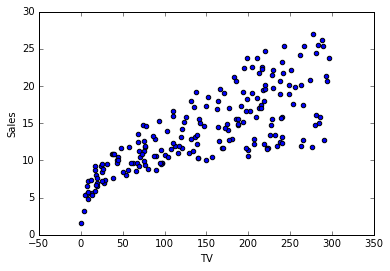

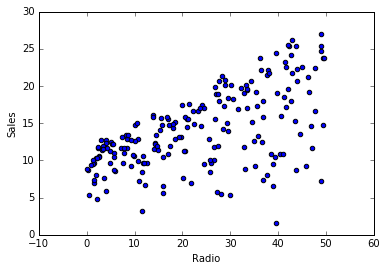

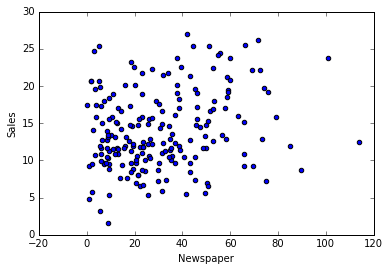

In [27]:
#2. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df.plot.scatter(x="TV", y="Sales")
print ("TV and Sales: Relationship looks to be positive and linear which indicates that the TV data has good predictive power for Sales")
df.plot.scatter(x="Radio", y="Sales")
print ("Radio and Sales: Relationship looks positive, but not linear")
df.plot.scatter(x="Newspaper", y="Sales")
print ("Newspaper and Sales: Data points seem random, does not look like a strong relationship between Newspaper and Sales.")

In [28]:
#3. 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

regr = linear_model.LinearRegression(fit_intercept=True)
data = df[["TV", "Sales"]]
TV = data.TV.reshape(len(data), 1)
Sales = data.Sales.reshape(len(data), 1)
# Build SLR model on TV and Sales
fit = regr.fit(TV, Sales)

print ("The linear regression coefficient for TV is %.5f" % (fit.coef_))
print("For a one unit change in TV advertising, there will be a positive change in Sales of %.4f" % (fit.coef_) )

The linear regression coefficient for TV is 0.04754
For a one unit change in TV advertising, there will be a positive change in Sales of 0.0475


The MSE for Training Data is 3.2048
The MSE for the Testing Data is 2.0784
The coefficients for TV, Radio and Newspaper are below (respectively):
[[ 0.04544878  0.1785548   0.0011582 ]]


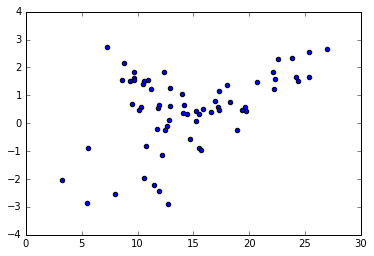

In [29]:
"""Split the data randomly into a training and test set (keep 1/3rd of the data for test).

    (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error.
    (2 pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?
    (2 pts) Report the coefficients obtained by your model.
    (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

Ind = df[["TV", "Radio", "Newspaper"]]
Dep = df[["Sales"]]

#Step 1: Split the data randomly into a training and test set (keep 1/3rd of the data for test).
Ind_Train, Ind_Test, Dep_Train, Dep_Test = train_test_split(Ind, Dep, test_size=0.33)

#Step 2: Fit an MLR on all the feature variables using the training data
MLR = linear_model.LinearRegression()
MLR.fit(Ind_Train, Dep_Train)

#Test data
y_train = MLR.predict(Ind_Train)
y_test = MLR.predict(Ind_Test)

#MSE for Test and Training Data
print ("The MSE for Training Data is %.4f" % mean_squared_error(Dep_Train, y_train))
print("The MSE for the Testing Data is %.4f" % mean_squared_error(Dep_Test, y_test))

#Coefficients from Model
print ("The coefficients for TV, Radio and Newspaper are below (respectively):" )
print (MLR.coef_)

#Plot of Residuals
plt.scatter(Dep_Test, Dep_Test - y_test)


#### Part 4. The plot of residuals is not randomly distributed around the mean (zero) which indicates that a multiple linear regression is not the best model for this data set.

# Bayesian Classifiers

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set.
4. Report the area under the ROC curve (AUC) for each model.
6. Justify the performance of each model, relative to the others. 
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance.

In [31]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

#### Create Test and Training Data Sets, and Create models using 1,000 training points

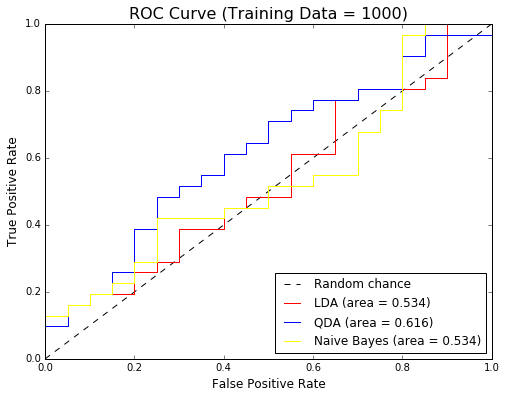

In [32]:
# convert the Direction data into a 0,1 classifier
data['Class'] = data['Direction'].map(lambda x: 1 if x == 'Up' else 0)

x_data=data[['Lag1','Lag2','Lag3','Lag4','Lag5']]
y_data=data['Class']

# split into train and test data

x_train1 = x_data.iloc[199:1199]
x_test1 = x_data.iloc[1199:1250]

y_train1 = y_data.iloc[199:1199]
y_test1 = y_data.iloc[1199:1250]

#pass train and test data to build  models
#Linear Discriminant Analysis
lda = LDA()
lda.fit(x_train1,y_train1)
lda_prob = lda.predict_proba(x_test1)[:, 1]

#Quadratic Discriminant Analysis
qda = QDA()
qda.fit(x_train1,y_train1)
qda_prob = qda.predict_proba(x_test1)[:, 1]

#Gaussian NB
gb = GaussianNB()
gb.fit(x_train1,y_train1)
gb_prob = gb.predict_proba(x_test1)[:, 1]

#store probabilities of getting positive class
#import numpy as np

#ROC Curves
fpr_lda, tpr_lda, _ = roc_curve(y_test1, lda_prob)
fpr_qda, tpr_qda, _ = roc_curve(y_test1, qda_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test1, gb_prob)

# ROC Score
lda_score = roc_auc_score(y_test1, lda_prob)
qda_score = roc_auc_score(y_test1, qda_prob)
gb_score = roc_auc_score(y_test1, gb_prob)
roc_scores = [lda_score, qda_score, gb_score]

import matplotlib.pyplot as plt
%matplotlib inline

# Graphical ROC Curve
labels = ['LDA','QDA','Naive Bayes']
fpr_list = [fpr_lda, fpr_qda, fpr_gb]
tpr_list = [tpr_lda, tpr_qda, tpr_gb]
color = ['red','blue','yellow']

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1], linestyle='--', color='black', label='Random chance')
for i in range(len(labels)):
    plt.plot(fpr_list[i], tpr_list[i], color = color[i],
            label="{} (area = {:.3f})".format(labels[i], roc_scores[i]))

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.title('ROC Curve (Training Data = 1000)', fontsize = 16)

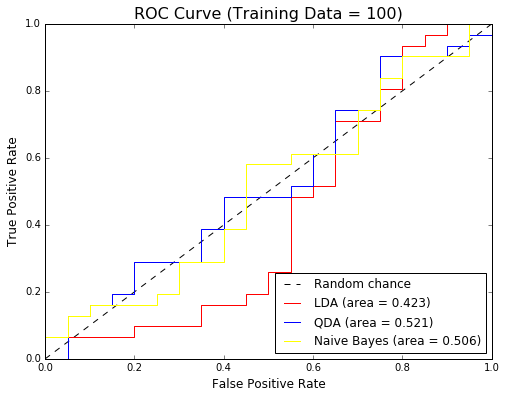

In [33]:
# split into train and test data

x_train2 = x_data.iloc[1099:1199]
x_test2 = x_data.iloc[1199:1250]

y_train2 = y_data.iloc[1099:1199]
y_test2 = y_data.iloc[1199:1250]

#pass train and test data to build  models
#Linear Discriminant Analysis
lda = LDA()
lda.fit(x_train2,y_train2)
lda_prob = lda.predict_proba(x_test2)[:, 1]

#Quadratic Discriminant Analysis
qda = QDA()
qda.fit(x_train2,y_train2)
qda_prob = qda.predict_proba(x_test2)[:, 1]

#Gaussian NB
gb = GaussianNB()
gb.fit(x_train2,y_train2)
gb_prob = gb.predict_proba(x_test2)[:, 1]

#store probabilities of getting positive class
#import numpy as np

#ROC Curves
fpr_lda, tpr_lda, _ = roc_curve(y_test2, lda_prob)
fpr_qda, tpr_qda, _ = roc_curve(y_test2, qda_prob)
fpr_gb, tpr_gb, _ = roc_curve(y_test2, gb_prob)

# ROC Score
lda_score = roc_auc_score(y_test2, lda_prob)
qda_score = roc_auc_score(y_test2, qda_prob)
gb_score = roc_auc_score(y_test2, gb_prob)
roc_scores = [lda_score, qda_score, gb_score]

import matplotlib.pyplot as plt
%matplotlib inline

# Graphical ROC Curve
labels = ['LDA','QDA','Naive Bayes']
fpr_list = [fpr_lda, fpr_qda, fpr_gb]
tpr_list = [tpr_lda, tpr_qda, tpr_gb]
color = ['red','blue','yellow']

plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1], linestyle='--', color='black', label='Random chance')
for i in range(len(labels)):
    plt.plot(fpr_list[i], tpr_list[i], color = color[i],
            label="{} (area = {:.3f})".format(labels[i], roc_scores[i]))

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.title('ROC Curve (Training Data = 100)', fontsize = 16)

#### Part 5 Answer
The QDA model performed the best, as evidenced by the highest ROC score. Both LDA and Naive Bayes perform a little bit better than random chance. All had an ROC score greater than .5, which means that all models are more likely to predict a true positive rate than random chance. 

#### Part 6 Answer
In repeating the models using only 100 data points for the training set, it is expected that the models will perform worse. This is evident in the 2nd ROC Curve graph, where each ROC score is lower than the 1st. The models do not do much better than random chance (and the LDA model does worse than random chance). This indicates that the models are all underfit because of the lack of training data. 

# House Prices (kaggle competition)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import Imputer

train_data = pd.read_csv('Q6train.csv')
test_data = pd.read_csv('Q6test.csv')
train_data.shape

(1460, 81)

In [35]:
frames = [train_data, test_data]
combined_pre = pd.concat(frames)
combined = combined_pre.drop(['Id'], axis=1)

combined.shape

(2919, 80)

In [36]:
#check for null values
def null_check():
    test = combined.columns.values
    
    i = 0
    
    for feature in test:
        num_null = combined[feature].isnull().sum()
        if num_null > 0:
            print (feature, num_null)
            i += 1
    if i == 0:
        print ("The data has no nulls!")

null_check()

Alley 2721
BsmtCond 82
BsmtExposure 82
BsmtFinSF1 1
BsmtFinSF2 1
BsmtFinType1 79
BsmtFinType2 80
BsmtFullBath 2
BsmtHalfBath 2
BsmtQual 81
BsmtUnfSF 1
Electrical 1
Exterior1st 1
Exterior2nd 1
Fence 2348
FireplaceQu 1420
Functional 2
GarageArea 1
GarageCars 1
GarageCond 159
GarageFinish 159
GarageQual 159
GarageType 157
GarageYrBlt 159
KitchenQual 1
LotFrontage 486
MSZoning 4
MasVnrArea 23
MasVnrType 24
MiscFeature 2814
PoolQC 2909
SalePrice 1459
SaleType 1
TotalBsmtSF 1
Utilities 2


In [37]:
#fix null values

# Impute missing values in Lot Frontage with median
lot_frontage_med = combined['LotFrontage'].median()
combined['LotFrontage'] = combined['LotFrontage'].map(lambda x: lot_frontage_med if (np.isnan(x)) else x)

# create function to fix NULL values
def replace_null(variable, value_if_null):
    for item in variable:
        combined[item] = combined[item].map(lambda x: value_if_null if type(x) != str else x)
        
# Alley
replace_null(['Alley'], 'None')

# Veneer
veneer_features = ['MasVnrType']
replace_null(veneer_features, 'No Veneer')

combined['MasVnrArea'] = combined['MasVnrArea'].map(lambda x: 0 if (np.isnan(x)) else x)

# Basement
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
replace_null(basement_features, 'NoBasement')

# Electrical
replace_null(['Electrical'], 'SBrkr')

# Fireplace
replace_null(['FireplaceQu'], 'NoFireplace')

# Garage
replace_null(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], 'No Garage')
combined['GarageYrBlt'] = combined['GarageYrBlt'].map(lambda x: 0 if np.isnan(x) else int(x))

# Pool QC
replace_null(['PoolQC'], 'None')

# Fence
replace_null(['Fence'], 'None')

# Misc Features
replace_null(['MiscFeature'], 'None')

#BsmtFinSF1
combined['BsmtFinSF1'] = combined['BsmtFinSF1'].map(lambda x: 0 if (np.isnan(x)) else x)

#BsmtFinSF2
combined['BsmtFinSF2'] = combined['BsmtFinSF2'].map(lambda x: 0 if (np.isnan(x)) else x)

#BsmtFullBath
combined['BsmtFullBath'] = combined['BsmtFullBath'].map(lambda x: 0 if (np.isnan(x)) else x)

#BsmtHalfBath
combined['BsmtHalfBath'] = combined['BsmtHalfBath'].map(lambda x: 0 if (np.isnan(x)) else x)

#BsmtUnfSF
combined['BsmtUnfSF'] = combined['BsmtUnfSF'].map(lambda x: 0 if (np.isnan(x)) else x)

#Exterior1st
replace_null(['Exterior1st'], 'None')

#Exterior2nd
replace_null(['Exterior2nd'], 'None')

#Functional
replace_null(['Functional'], 'None')

#GarageArea
combined['GarageArea'] = combined['GarageArea'].map(lambda x: 0 if (np.isnan(x)) else x)

#GarageCars
combined['GarageCars'] = combined['GarageCars'].map(lambda x: 0 if (np.isnan(x)) else x)

#KitchenQual
replace_null(['KitchenQual'], 'None')

#MSZoning
replace_null(['MSZoning'], 'None')

#SalePrice
combined['SalePrice'] = combined['SalePrice'].map(lambda x: combined['SalePrice'].median() if (np.isnan(x)) else x)

#SaleType
replace_null(['SaleType'], 'None')

#TotalBsmtSF
combined['TotalBsmtSF'] = combined['TotalBsmtSF'].map(lambda x: 0 if (np.isnan(x)) else x)

#Utilities
replace_null(['Utilities'], 'None')

In [38]:
#check for null values
def null_check():
    test = combined.columns.values
    
    i = 0
    
    for feature in test:
        num_null = combined[feature].isnull().sum()
        if num_null > 0:
            print (feature, num_null)
            i += 1
    if i == 0:
        print ("The data has no nulls!")

null_check()

The data has no nulls!


In [39]:
#creation of dummy variables
Dummy = pd.get_dummies(combined)
Dummy.shape

(2919, 311)

In [40]:
#reduce variables by removing features that have less than 70% variance
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
sel.fit(Dummy)
col_array = sel.get_support(indices=True)

Master = Dummy.iloc[:,col_array]
Master.shape

(2919, 55)

In [41]:
#split reduced data into master Train and master Test sets
Train_Master = Master.iloc[0:1460]
Test_Master = Master.iloc[1460:2920]
Test_Master = Test_Master.drop(['SalePrice'], axis=1)

#split train_master into x and y data
DummyIndReduced = Train_Master.drop(['SalePrice'], axis=1)
Dependent = Train_Master['SalePrice']

R-Squared Value: 0.848296
Interpret: 330384.152013


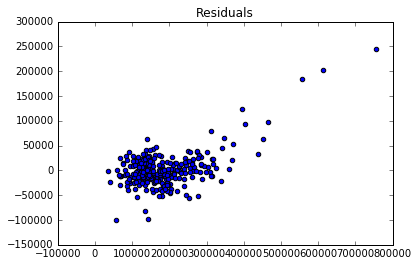

In [42]:
#Linear Regression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(DummyIndReduced, Dependent, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# R-Squared value
print('R-Squared Value: %2f' % r2_score(y_test,regr.predict(X_test)))
print('Interpret: %2f' % regr.intercept_)

#Plot of Residuals
plt.scatter(y_test, y_test - regr.predict(X_test))
plt.title('Residuals')

#Predict values for test_master data
LR = regr.predict(Test_Master)
Prediction_LR = pd.DataFrame(LR)
Prediction_LR.to_csv('LR_Predictions.csv')

In [43]:
#Ridge Regression
reg = linear_model.RidgeCV(alphas=[10.0, 11.0, 12.0, 13.0])
reg.fit(X_train, y_train)

print ('Optimum Alpha: %2f' % reg.alpha_)
print ('R-Squared Value: %2f' %reg.score(X_train, y_train))

#Predict values for test_master data
Ridge = reg.predict(Test_Master)
Prediction_Ridge = pd.DataFrame(Ridge)
Prediction_Ridge.to_csv('Ridge_Predictions.csv')

Optimum Alpha: 13.000000
R-Squared Value: 0.837404


In [44]:
#Lasso Regression
las = linear_model.LassoCV(normalize=True)
las.fit(X_train, y_train)

print ('Optimum Alpha: %2f' % las.alpha_)

print ('R-Squared Value: %2f' %las.score(X_train, y_train))

#Predict values for test_master data
Lasso = reg.predict(Test_Master)
Prediction_Lasso = pd.DataFrame(Lasso)
Prediction_Lasso.to_csv('Lasso_Predictions.csv')

Optimum Alpha: 19.034739
R-Squared Value: 0.832713


In [45]:
#Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver = 'lbfgs', random_state= 42)
mlp.fit(X_train, y_train)

print ('R-Squared Value: %2f' %mlp.score(X_train, y_train))
print ('# of Layers: %2f' % mlp.n_layers_)

#Predict values for test_master data
MLPerc = mlp.predict(Test_Master)
Prediction_MLP = pd.DataFrame(MLPerc)
Prediction_MLP.to_csv('MLP_Predictions.csv')

R-Squared Value: 0.778360
# of Layers: 3.000000


### Explanation and Scores

Data Preprocessing - First, both the test and training sets were combined to ensure that all data preprocessing was consistent across all data. Then, all missing values were filled in ('None' for categorical variables and either zero or the median value for the numerical variables). All categorical variables were converted to Dummy variables. Then, variables were selected and discarded for the modeling. In order to get the most accurate prediction for home prices, variables that have a high variance of home price are not as helpful. The VarianceThreshold method was used to remove variables with a variance theshold higher than 70%. This reduced the number of variables to 55 from 311. 

Trail/Error and Lessons Learned - 
The data preprocessing took the majority of the time because various methods for combining the data and selecting the most useful parameters were researched and tested before settling on the VarianceThreshold method. Additionally, all models were tested using the data set prior to feature selection, but all performed better with fewer variables.

Parameter settings for the Lasso, Ridge, and MLP models were also tweaked, but the default settings were found to build the best model.


#### Scores
Submission 1: MLP - 0.21774

Submission 2: Lasso - 0.19243 (improved previous score by 0.02531)

Submission 3: Ridge - 0.19243 (no improvement)

Submission 4: Simple Linear Regression - 0.19243 (no improvement)

#### Final Placement/Score

942nd place / Score: 0.19243

#### Kaggle Name - Beck

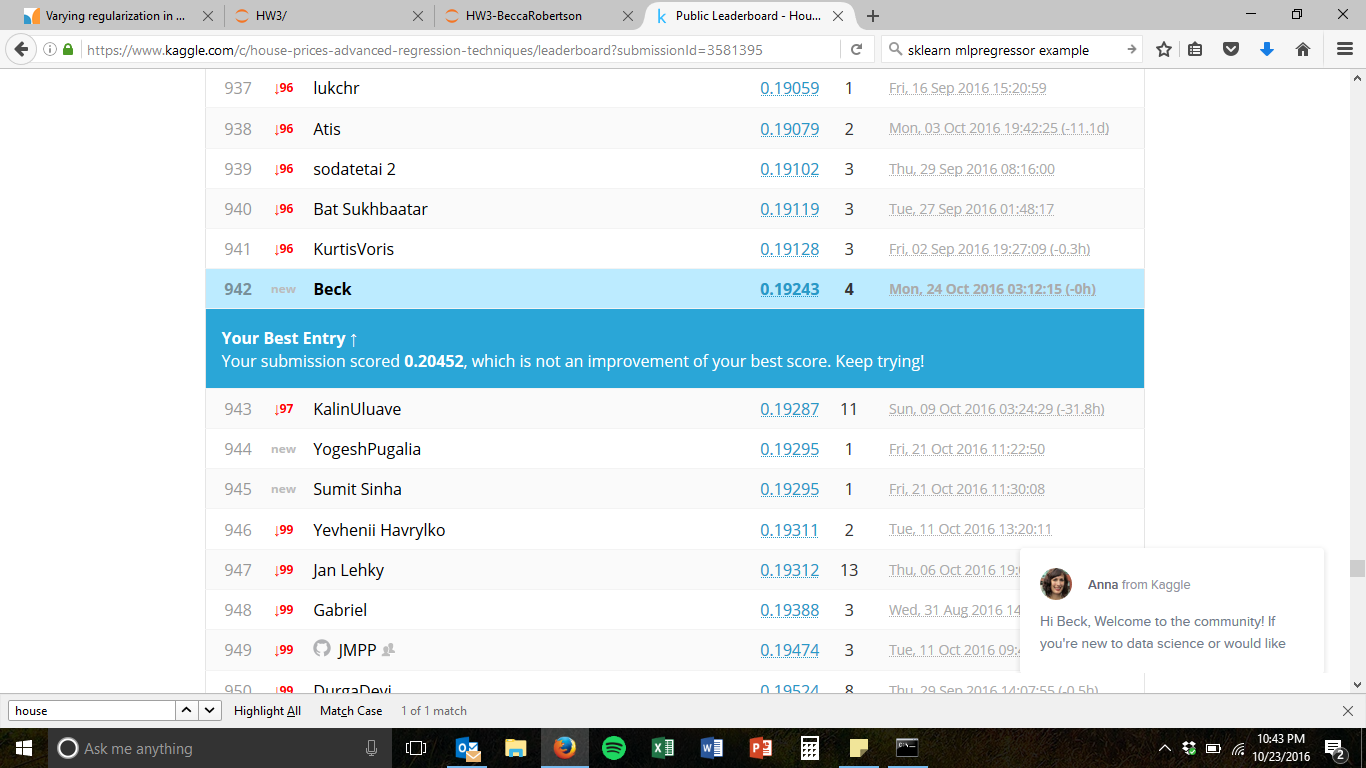

In [46]:
from IPython.display import Image
Image(filename='Screenshot.png')